In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [73]:
nsamp=10000
dT_LGM = np.random.normal(loc=-5.0,scale=1.0,size=nsamp)
dF_LGM = np.random.normal(loc=-8.8,scale=2.0,size=nsamp)
values_LGM = np.zeros((2,nsamp))
values_LGM[0]=dT_LGM
values_LGM[1]=dF_LGM
kde_LGM = stats.gaussian_kde(values_LGM)
density_LGM = kde_LGM(values_LGM)


In [74]:
values_inverse=np.zeros((2,nsamp))
values_inverse[1]=dT_LGM
values_inverse[0]=dF_LGM
kde_inverse = stats.gaussian_kde(values_inverse)

<IPython.core.display.Javascript object>


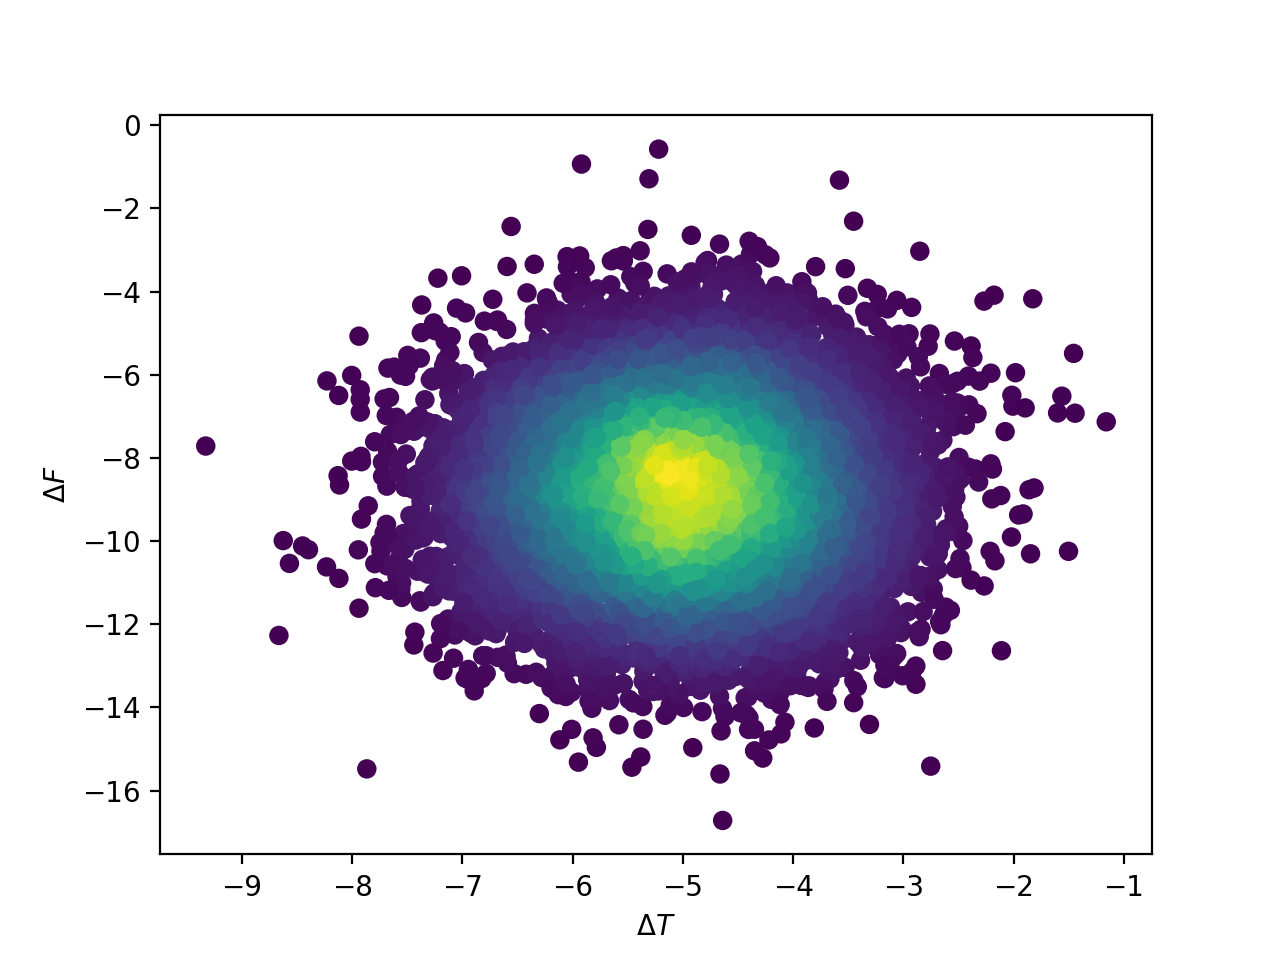

Text(0.5, 0, '$\\Delta T$')

In [31]:
plt.figure()
ax_LGM=plt.subplot(111)
ax_LGM.scatter(dT_LGM,dF_LGM,c=density_LGM)
ax_LGM.set_ylabel(r"$\Delta F$")
ax_LGM.set_xlabel(r"$\Delta T$")

In [46]:
nbins=int(nsamp/100)
S_possibilities = np.linspace(.1,10,num=nbins)
S_possibilities_big = np.linspace(.1,10,num=nsamp)
F2x=3.7

In [72]:
def get_LGM_likelihood(S_possibilities):
    likelihood_LGM = []

    Ts = np.linspace(-10,0,nsamp)
    
    for S in S_possibilities:
        #the plane is given by
        Fs=Ts*(F2x/S)
        #now evaluate the kernel density on the plane using kde
        Svals=np.vstack((Ts,Fs))
        likelihood_LGM += [np.sum(kde_LGM(Svals))]
    return likelihood_LGM/np.max(likelihood_LGM)

def get_LGM_likelihood_inverse(S_possibilities):
    likelihood_LGM_inverse = []

    Fs = np.linspace(np.min(dF_LGM),np.max(dF_LGM),nsamp)
    
    for S in S_possibilities:
        #the plane is given by
        Ts=S*Fs/F2x
        #now evaluate the kernel density on the plane using kde
        Svals=np.vstack((Fs,Ts))
        likelihood_LGM_inverse += [np.sum(kde_inverse(Svals))]
    return likelihood_LGM_inverse/np.max(likelihood_LGM_inverse)

In [38]:
def webb_likelihood(S_possibilities):
    Tav=np.average(dT_LGM)
    epsilon=dT_LGM/Tav
    likelihood_webb=[]
    for S in S_possibilities:
        dTsynth=S*dF_LGM/F2x+epsilon
        kde_webb = stats.gaussian_kde(dTsynth) 
        likelihood_webb+=[float(kde_webb(Tav))]
    return likelihood_webb/np.max(likelihood_webb)

In [ ]:
likelihood=get_LGM_likelihood(S_possibilities)

In [64]:
likelihood_inverse=get_LGM_likelihood_inverse(S_possibilities)

In [ ]:
likelihood_inverse2=get_LGM_likelihood_inverse(S_possibilities)

In [77]:
likelihood2=get_LGM_likelihood(S_possibilities)
lwebb=webb_likelihood(S_possibilities_big)

<IPython.core.display.Javascript object>


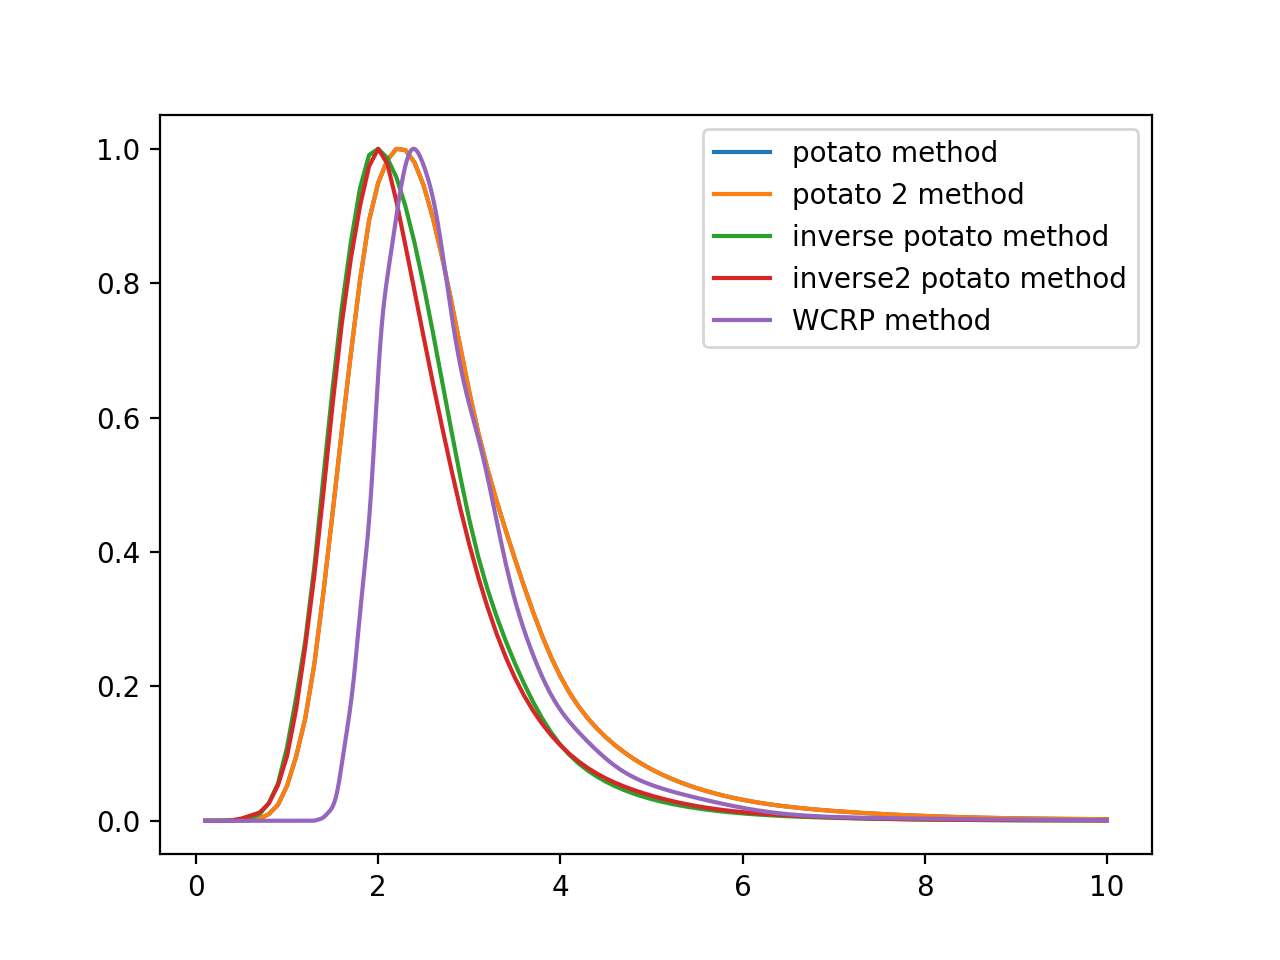

In [79]:
plt.figure()
plt.plot(S_possibilities,likelihood,label="potato method")
plt.plot(S_possibilities,likelihood,label="potato 2 method")
plt.plot(S_possibilities,likelihood_inverse,label="inverse potato method")
plt.plot(S_possibilities,likelihood_inverse2,label="inverse2 potato method")
plt.plot(S_possibilities_big,lwebb,label="WCRP method")
plt.legend()